# Step 0: Load Packages and Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os

from scipy.sparse import coo_matrix #parse matrix representation from the SciPy library, where the matrix is stored in Coordinate (COO) format, making it efficient for storing and processing large, sparse datasets.

import spacy #SpaCy is a popular library for natural language processing (NLP) in Python, used for tasks like tokenization, 
from spacy.lang.en.stop_words import STOP_WORDS

# Install the model
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.3 MB/s eta 0:00:10
     --- ------------------------------------ 1.0/12.8 MB 1.7 MB/s eta 0:00:07
     ---- ----------------------------------- 1.3/12.8 MB 1.6 MB/s eta 0:00:08
     ----- ---------------------------------- 1.8/12.8 MB 1.8 MB/s eta 0:00:06
     -------- ------------------------------- 2.6/12.8 MB 2.1 MB/s eta 0:00:05
     ---------- ----------------------------- 3.4/12.8 MB 2.3 MB/s eta 0:00:05
     ------------ --------------------------- 3.9/12.8 MB 2.4 MB/s eta 0:00:04
     ------------- -------------------------- 4.5/12.8 MB 2.5 MB/s eta 0:00:04
     ------------- -------------------------- 4.5/12.8 MB 2.5 MB/s eta 0:00:04
 

# Step 1: Data Loading and Preprocessing

In [32]:
# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Move up one directory level to correctly access the data file
file_path = os.path.join(current_dir, '..', 'data', 'marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv')

# Normalize the path for the OS
file_path = os.path.normpath(file_path)
print(f"Constructed file path: {file_path}")

# Check if the file exists and read the CSV
if os.path.exists(file_path):
    train_data = pd.read_csv(file_path, sep='\t')
    print(df.head())
else:
    print(f"File not found: {file_path}")

Current working directory: c:\Users\PC\Downloads\New folder\Arcade_Techsy_Product_Recommendation_Sytem\product\model
Constructed file path: c:\Users\PC\Downloads\New folder\Arcade_Techsy_Product_Recommendation_Sytem\product\data\marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv
                            Uniq Id            Crawl Timestamp  \
0  1705736792d82aa2f2d3caf1c07c53f4  2020-09-24 03:21:12 +0000   
1  95a9fe6f4810fcfc7ff244fd06784f11  2020-10-30 14:04:08 +0000   
2  8d4d0330178d3ed181b15a4102b287f2  2020-08-06 05:51:47 +0000   
3  fddc4df45b35efd886794b261f730c51  2020-07-15 11:22:04 +0000   
4  0990cf89a59ca6a0460349a3e4f51d42  2020-11-26T12:27:20+00:00   

   Dataset Origin                        Product Id  Product Barcode  \
0             NaN  2e17bf4acecdece67fc00f07ad62c910              NaN   
1             NaN  076e5854a62dd283c253d6bae415af1f              NaN   
2             NaN  8a4fe5d9c7a6ed26cc44d785a454b124              N

In [33]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


# Basic Operations

In [34]:
train_data['Product Tags']

0       OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1       Nice 'n Easy Permanent Color, 111 Natural Medi...
2       Clairol Nice 'N Easy Permanent Color 7/106A Na...
3       Kokie Professional Matte Lipstick, Hot Berry, ...
4       Gillette TRAC II Plus Razor Blade Refills, Fit...
                              ...                        
4995    Garden Mint Room Spray (Double Strength), 4 ou...
4996    Garnier Nutrisse Nourishing Hair Color Creme (...
4997    Nail File Electric Drill, 6 in 1 Professional ...
4998    Creed Love In Black Hair And Body Wash 6.8oz/2...
4999                    Foundation, Wal-mart, Walmart.com
Name: Product Tags, Length: 5000, dtype: object

In [35]:
train_data.shape

(5000, 10)

In [36]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [37]:
# Fill missing values in 'Product Rating' with a default value (e.g., 0)
train_data['Product Rating'].fillna(0, inplace=True)
# Fill missing values in 'Product Reviews Count' with a default value (e.g., 0)
train_data['Product Reviews Count'].fillna(0, inplace=True)
# Fill missing values in 'Product Category' with a default value (e.g., 'Unknown')
train_data['Product Category'].fillna('', inplace=True)
# Fill missing values in 'Product Brand' with a default value (e.g., 'Unknown')
train_data['Product Brand'].fillna('', inplace=True)
# Fill missing values in 'Product Description' with an empty string
train_data['Product Description'].fillna('', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_37660\3654264793.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Rating'].fillna(0, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_37660\3654264793.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [38]:
train_data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [39]:
train_data.duplicated().sum()

0

In [40]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [41]:
train_data['ID'] = pd.to_numeric(train_data['ID'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int).astype('Int64')
train_data['ProdID'] = pd.to_numeric(train_data['ProdID'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int).astype('Int64')


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_37660\717264196.py:1: SyntaxWarning: invalid escape sequence '\d'
  train_data['ID'] = pd.to_numeric(train_data['ID'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int).astype('Int64')
C:\Users\PC\AppData\Local\Temp\ipykernel_37660\717264196.py:2: SyntaxWarning: invalid escape sequence '\d'
  train_data['ProdID'] = pd.to_numeric(train_data['ProdID'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int).astype('Int64')


In [42]:
# Check the data types of ID and ProdID columns
train_data[['ID', 'ProdID']].dtypes

ID        Int64
ProdID    Int64
dtype: object

# Step 2: EDA (Exploratory Data Analysis)

In [43]:
# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1666
Number of unique items: 1607
Number of unique ratings: 36


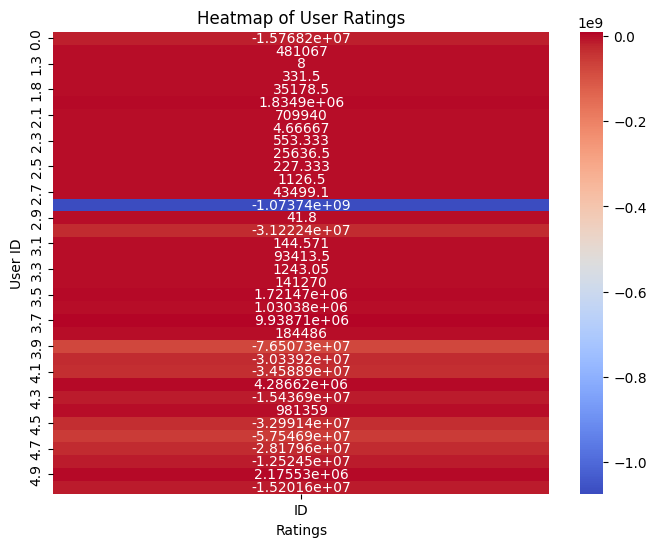

In [44]:
# Pivot the DataFrame to create a heatmap btw ID and ratinngs
heatmap_data = train_data.pivot_table('ID', 'Rating')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

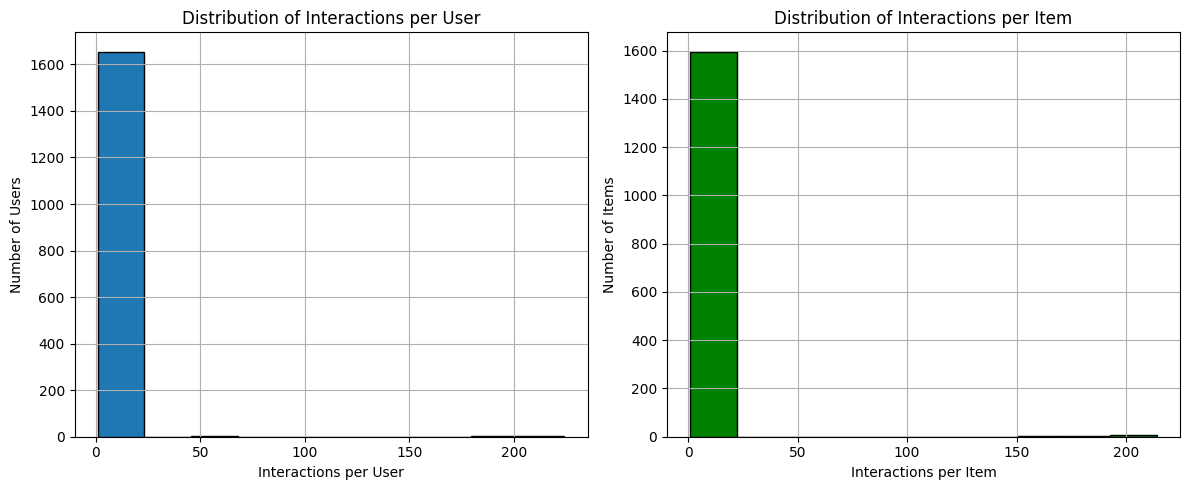

In [45]:
# Distribution of interactions btw number of users and distribution of interactions per user
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

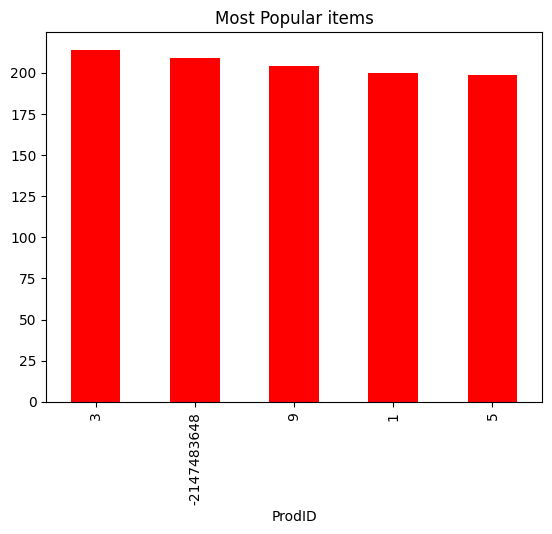

In [46]:
# Most popular items-prodID
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

<Axes: xlabel='Rating'>

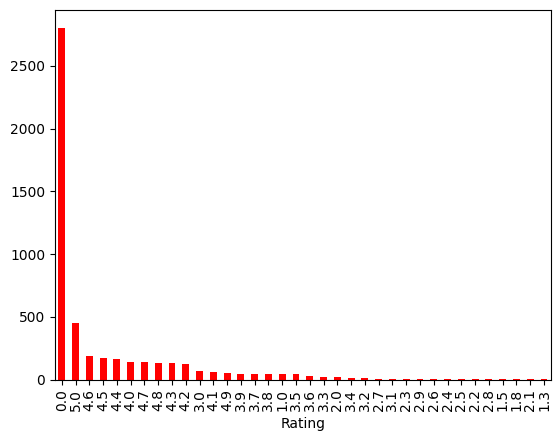

In [47]:
# most rated counts-rating count
train_data['Rating'].value_counts().plot(kind='bar',color='red')

# Step 2: EDA (Exploratory Data Analysis)

# Step 3: Data Cleaning and Tags Creations

In [48]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [49]:
nlp = spacy.load("en_core_web_sm")  # Loads the small English language model from SpaCy for NLP tasks

def clean_and_extract_tags(text):  # Defines a function to clean the text and extract relevant tags
    doc = nlp(text.lower())  # Converts the text to lowercase and processes it through the SpaCy NLP pipeline
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]  
    # Filters the tokens, keeping only alphanumeric tokens that are not stop words
    return ', '.join(tags)  # Joins the filtered tokens into a comma-separated string

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']  # Specifies the columns to apply the function on

for column in columns_to_extract_tags_from:  # Loops through each specified column
    train_data[column] = train_data[column].apply(clean_and_extract_tags)  
    # Applies the `clean_and_extract_tags` function to each column and updates the dataset


In [50]:
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

# Rating Base Recommendations System

In [51]:
average_ratings = train_data.groupby(['Name', 'ReviewCount', 'Brand', 'ImageURL'])['Rating'].mean().reset_index()
# Groups the dataset by 'Name', 'ReviewCount', 'Brand', and 'ImageURL', creating unique product combinations

# Calculates the average of the 'Rating' column for each group (i.e., each unique combination of Name, ReviewCount, Brand, and ImageURL)
# The result is a DataFrame where each row represents the average rating for a specific product

# Resets the index, so that the grouping columns ('Name', 'ReviewCount', 'Brand', 'ImageURL') appear as regular columns 
# in the final DataFrame instead of being used as the index


In [52]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)
# Sorts the DataFrame 'average_ratings' in descending order based on the 'Rating' column
# This ensures that the items with the highest average ratings come first

rating_base_recommendation = top_rated_items.head(10)
# Selects the top 10 items with the highest ratings from the sorted DataFrame
# These top-rated items can be used for recommendation purposes


In [53]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)

C:\Users\PC\AppData\Local\Temp\ipykernel_37660\565725879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
C:\Users\PC\AppData\Local\Temp\ipykernel_37660\565725879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [54]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


C:\Users\PC\AppData\Local\Temp\ipykernel_37660\393183274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]


,Name,ReviewCount,Brand,ImageURL,Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
3842,"Red Devil 0322 Steel Wool # 00 Very Fine, 8 Pa...",1,"red, devil",https://i5.walmartimages.com/asr/60bfe5ba-774c...,5
510,"Air Wick Plug in Starter Kit, Warmer + 1 Refil...",1,"air, wick",https://i5.walmartimages.com/asr/0fac65b2-c6aa...,5
3841,Recovery Complex Anti-Frizz Shine Serum by Bai...,4,"bain, de, terre",https://i5.walmartimages.com/asr/fcdb4d2e-3727...,5
2687,Long Aid Extra Dry Formula Curl Activator Gel ...,12,"long, aid",https://i5.walmartimages.com/asr/f7f29199-bfa5...,5
2062,"Good Sense 60-Day Air Care System, Citrus, 2 o...",1,diversey,https://i5.walmartimages.com/asr/025a7068-7bb1...,5


# Content Base Recommendation system (User Preferences or Items similarities)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# Initializes a TF-IDF Vectorizer from scikit-learn, configured to remove English stop words
# This will convert the 'Tags' text data into a matrix of TF-IDF features

tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
# Fits the vectorizer to the 'Tags' column of the 'train_data' DataFrame and transforms the text data into a TF-IDF matrix
# Each row corresponds to a document (e.g., product tags), and each column corresponds to a unique term from the tags

cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)
# Computes the cosine similarity matrix based on the TF-IDF matrix
# This results in a matrix where each entry represents the similarity between two products based on their tags


In [56]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
# Defines a variable 'item_name' that stores the name of the item for which we want to find the index in the dataset

item_index = train_data[train_data['Name'] == item_name].index[0]
# Searches the 'train_data' DataFrame for the row where the 'Name' column matches 'item_name'
# Retrieves the index of the first occurrence of that item in the DataFrame


In [57]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))
# Enumerates the cosine similarity scores for the item at 'item_index'
# This creates a list of tuples, where each tuple contains the index of a similar item and its corresponding similarity score


In [58]:
similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)
# Sorts the 'similar_items' list in descending order based on the similarity scores (the second element of each tuple)
# This arranges the items so that the most similar ones appear first

top_similar_items = similar_items[1:10]
# Selects the top 9 items from the sorted list of similar items, excluding the first item (the item itself)
# This creates a list of the most similar items to recommend

recommended_items_indices = [x[0] for x in top_similar_items]
# Extracts the indices of the recommended items from 'top_similar_items'
# This results in a list of indices that can be used to retrieve details about the recommended items from the original dataset


In [59]:
train_data.iloc[recommended_items_indices][['Name', 'ReviewCount', 'Brand']]
# Uses iloc to select rows from the 'train_data' DataFrame based on the indices in 'recommended_items_indices'
# Retrieves the specified columns: 'Name', 'ReviewCount', and 'Brand' for the recommended items
# This results in a DataFrame containing the names, review counts, and brands of the recommended items


,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


In [60]:
train_data.head(3)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792,2,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,95,76,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8,8,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."


# Function To Recommend Products for Content Base

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)-'top_n'  representing the number of similar items to recommend///////////
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [62]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


In [63]:
# Example: Get content-based recommendations for a specific item
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
3023,Be Matte Lipstick - Pink,2.0,"city, color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0


# Collaborative Filtering (User Item Similarity)

In [64]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0).astype(int)
# Creates a pivot table from the 'train_data' DataFrame
# 'ID' serves as the index (representing users), 'ProdID' serves as the columns (representing products),
# and 'Rating' serves as the values to fill the table
# The 'aggfunc' parameter specifies that the mean rating should be calculated for each user-product combination
# .fillna(0) replaces any NaN values (indicating no rating given) with 0
# .astype(int) converts the resulting ratings to integers
# The result is a user-item matrix where each cell contains the average rating a user has given to a product, or 0 if no rating exists


In [65]:
user_similarity = cosine_similarity(user_item_matrix)
# Computes the cosine similarity matrix for the 'user_item_matrix'
# This results in a matrix where each entry represents the similarity between two users based on their ratings of products
# Users with similar rating patterns will have higher similarity scores


In [66]:
target_user_id = 4
# Defines the ID of the target user for whom we want to find similar users or make recommendations

target_user_index = user_item_matrix.index.get_loc(target_user_id)
# Retrieves the index of the target user in the 'user_item_matrix' based on their user ID
# The 'get_loc' method is used to find the integer location (index) of the specified user ID in the index of the DataFrame


In [67]:
user_similarities = user_similarity[target_user_index]
# Extracts the similarity scores for the target user using their index in the 'user_similarity' matrix
# This results in an array containing similarity scores between the target user and all other users

similar_user_indices = user_similarities.argsort()[::-1][1:]
# Sorts the similarity scores in ascending order and retrieves the indices of the sorted array
# [::-1] reverses the order to get the most similar users first
# [1:] excludes the first index (which corresponds to the target user itself) from the list of similar users


In [68]:
# Check NaN values in the user-item matrix
user_item_matrix.isnull().sum().sum()

0

In [69]:
recommend_items = []
# Initializes an empty list to store items recommended based on similar users

for user_index in similar_user_indices:
    # Iterates over each index of similar users to gather recommendations
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    # Retrieves the ratings of the current similar user from the user-item matrix

    not_rated_by_target_user = (rated_by_similar_user == 0).values & (user_item_matrix.iloc[target_user_index] == 0).values
    # Creates a boolean array to identify items that have not been rated by both the current similar user and the target user
    # This helps in finding items that are potentially interesting to the target user

    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])
    # Extends the 'recommend_items' list with the first 10 items that have not been rated by the target user
    # These items are derived from the columns of the user-item matrix using the boolean mask

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]
# Filters the original 'train_data' DataFrame to get details of recommended items
# It checks if the 'ProdID' of items in 'train_data' is present in the 'recommend_items' list
# The resulting DataFrame contains only the specified columns: 'Name', 'ReviewCount', 'Brand', 'ImageURL', and 'Rating'


In [70]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"paul, sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"ag, hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


# Function That Recommend Items

In [71]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0).values & (user_item_matrix.iloc[target_user_index] == 0).values


        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)

# Example usage
target_user_id = 4
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top 10 recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 10 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,0.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,0.0
155,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,0.0
174,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
193,"Revlon ColorStay Skinny Liquid Liner, 304 Gree...",70.0,revlon,https://i5.walmartimages.com/asr/aa3b20a6-3d6d...,4.5
212,"Comvita Certified UMF 20+ Manuka Honey, Raw & ...",0.0,comvita,https://i5.walmartimages.com/asr/3cdc1498-a2ac...,0.0
241,"Ahava Mens Mineral Hand Cream, 3.4 Oz",0.0,ahava,https://i5.walmartimages.com/asr/f74e4bb7-47d3...,0.0


# Hybrid Recommendations

In [72]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)
    
    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    
    return hybrid_rec.head(10)

In [73]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0


In [74]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 10 # Change this to the user_id you want recommendations for
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'

hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4872,"L.A. Colors Matte Lipstick, Torrid Matte",8.0,colors,https://i5.walmartimages.com/asr/62d6d9fa-eee1...,4.8
1300,"e.l.f. Liquid Matte Lipstick, Tea Rose",476.0,cosmetics,https://i5.walmartimages.com/asr/58220de4-3875...,4.1
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,0.0


In [75]:
# Check user_item_matrix data type
user_item_matrix.dtypes

ProdID
-2147483648    int32
0              int32
1              int32
2              int32
3              int32
               ...  
956218809      int32
970912539      int32
1513514257     int32
2073829709     int32
2135948483     int32
Length: 1607, dtype: object

In [76]:
print(train_data[['ID', 'ProdID']].dtypes)

ID        Int64
ProdID    Int64
dtype: object


# Evaluation

In [77]:
from surprise import SVD, KNNBasic, NMF, SVDpp, KNNWithMeans, CoClustering
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import Dataset
from surprise import Reader


In [78]:
# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_data[['ID', 'ProdID', 'Rating']], reader)

# Define different algorithms with hyperparameter tuning
param_grid = {
    'SVD': {'n_factors': [50, 100], 'reg_all': [0.02, 0.05]},
    'KNNBasic': {'k': [20, 40], 'min_k': [1, 5]},
    'NMF': {'n_factors': [15, 30], 'reg_pu': [0.06, 0.1]},
    'SVDpp': {'n_factors': [50, 100], 'reg_all': [0.02, 0.05]},
    'KNNWithMeans': {'k': [20, 40], 'min_k': [1, 5]},
    'CoClustering': {'n_cltr_u': [3, 5], 'n_cltr_i': [3, 5]}
}


# Define different algorithms
algorithms = {
    'SVD': SVD,
    'KNNBasic': KNNBasic,
    'NMF': NMF,
    'SVDpp': SVDpp,
    'KNNWithMeans': KNNWithMeans,
    'CoClustering': CoClustering
}

grid_searches = []

# Perform hyperparameter tuning and evaluate each algorithm
for name, algo in algorithms.items():
    print(f"Evaluating {name} with hyperparameter tuning...")
    gs = GridSearchCV(algo, param_grid[name], measures=['rmse', 'mae'], cv=5)
    gs.fit(data)
    grid_searches.append(gs)
    print(f"Best RMSE for {name}: {gs.best_score['rmse']}")
    print(f"Best MAE for {name}: {gs.best_score['mae']}")
    print(f"Best parameters for {name}: {gs.best_params['rmse']}")
    print("\n")




Evaluating SVD with hyperparameter tuning...
Best RMSE for SVD: 2.235961370335084
Best MAE for SVD: 2.1225400601528746
Best parameters for SVD: {'n_factors': 50, 'reg_all': 0.05}


Evaluating KNNBasic with hyperparameter tuning...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...


In [79]:
# Find the best algorithm based on RMSE
# This line finds the minimum RMSE score among all the grid searches
best_algorithm = min(gs.best_score['rmse'] for gs in grid_searches)

# This line finds the index of the grid search that has the best (minimum) RMSE score
best_algorithm_index = [i for i, gs in enumerate(grid_searches) if gs.best_score['rmse'] == best_algorithm][0]

# This line gets the name of the algorithm corresponding to the best RMSE score
best_algorithm_name = list(algorithms.keys())[best_algorithm_index]

# This line gets the best parameters for the algorithm with the best RMSE score
best_algorithm_params = grid_searches[best_algorithm_index].best_params['rmse']

# Print the name of the best algorithm based on RMSE
print(f"Best algorithm based on RMSE: {best_algorithm_name}")

# Print the best parameters for the best algorithm
print(f"Best parameters for {best_algorithm_name}: {best_algorithm_params}")

Best algorithm based on RMSE: SVD
Best parameters for SVD: {'n_factors': 50, 'reg_all': 0.05}


In [80]:
# Get the RMSE and MAE scores for the best algorithm
# This line retrieves the best RMSE score for the algorithm with the best parameters
best_algorithm_rmse = grid_searches[best_algorithm_index].best_score['rmse']

# This line retrieves the best MAE score for the algorithm with the best parameters
best_algorithm_mae = grid_searches[best_algorithm_index].best_score['mae']

# Print the best RMSE score
print(f"Best RMSE: {best_algorithm_rmse}")

# Print the best MAE score
print(f"Best MAE: {best_algorithm_mae}")

Best RMSE: 2.235961370335084
Best MAE: 2.1225400601528746


In [81]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_recall_fscore_support

# Combine relevant features into a single string
train_data['combined_features'] = train_data.apply(lambda row: ' '.join([row['Category'], row['Brand'], row['Description'], row['Tags']]), axis=1)

# Vectorize the combined features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['combined_features'])

# Calculate cosine similarity between items
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on item similarity
def get_recommendations(prod_id, cosine_sim=cosine_sim):
    # Get the index of the product that matches the prod_id
    idx = train_data[train_data['ProdID'] == prod_id].index[0]

    # Get the pairwise similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the product indices
    prod_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar products
    return train_data['ProdID'].iloc[prod_indices]

# Example usage
prod_id = 101
recommended_products = get_recommendations(prod_id)
print(f"Products similar to {prod_id}: {recommended_products.tolist()}")

# Function to evaluate recommendations
def evaluate_recommendations(train_data, k=10):
    # Get unique user IDs
    user_ids = train_data['ID'].unique()

    # Initialize lists to store true and predicted values
    y_true = []
    y_pred = []

    for user_id in user_ids:
        # Get the products rated by the user
        user_data = train_data[train_data['ID'] == user_id]
        liked_products = user_data[user_data['Rating'] > 3]['ProdID'].tolist()

        # Get recommendations for each liked product
        for prod_id in liked_products:
            recommended_products = get_recommendations(prod_id)

            # Append true and predicted values
            y_true.extend([1] * len(recommended_products))
            y_pred.extend([1 if prod in liked_products else 0 for prod in recommended_products])

    # Calculate precision, recall, and F2 score
    precision, recall, f2_score, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', beta=2)

    return precision, recall, f2_score

# Example usage
precision, recall, f2_score = evaluate_recommendations(train_data)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F2 Score: {f2_score}")

Products similar to 101: [3, 101, 40, 765, 93, 99, 8, 67, 45, 1]
Precision: 1.0
Recall: 0.21436327739387956
F2 Score: 0.25432463136689976
